In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
# El conjunto de datos "tiare":
file = "tiare2.csv"

# Cargamos el conjunto de datos en un dataframe
all_variables = ['tamaño petalo','tamaño flor','tamaño hoja','tallo','target'] #ojo en el tarjet
features = ['tamaño petalo','tamaño flor','tamaño hoja','tallo']
target = ['target']

df = pd.read_csv(file, names=all_variables)
df.head()

,tamaño petalo,tamaño flor,tamaño hoja,tallo,target
NaN,1.0,2.0,3.0,4.0,target
0.0,3.0,2.5,6.4,0.2,tiare
1.0,3.2,3.5,6.7,0.4,tiare
2.0,3.7,3.6,6.3,0.5,tiare
3.0,2.9,3.8,6.4,0.5,tiare


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,tamaño petalo,tamaño flor,tamaño hoja,tallo
0,0.000000,0.000000,0.000000,1.000000
1,0.740741,0.277778,0.918919,0.000000
2,0.814815,0.833333,1.000000,0.052632
3,1.000000,0.888889,0.891892,0.078947
4,0.703704,1.000000,0.918919,0.078947


In [4]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,tamaño petalo,tamaño flor,tamaño hoja,tallo
0,4.756910,0.056557,0.002026,0.005889
1,-0.696112,-0.648963,-0.115143,-0.049450
2,-1.040145,0.356549,-0.152272,0.148563
3,-0.949034,0.549498,0.432254,-0.058317
4,-0.734134,0.665350,-0.361655,-0.068596


In [5]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.91107654, 0.06149759, 0.02627598, 0.00114989])

In [6]:
df_pca['target'] = df[target]
df_pca.columns = ['1', '2','3','4','target']
df_pca.head()

,1,2,3,4,target
0,4.756910,0.056557,0.002026,0.005889,tiare
1,-0.696112,-0.648963,-0.115143,-0.049450,tiare
2,-1.040145,0.356549,-0.152272,0.148563,tiare
3,-0.949034,0.549498,0.432254,-0.058317,tiare
4,-0.734134,0.665350,-0.361655,-0.068596,tiare


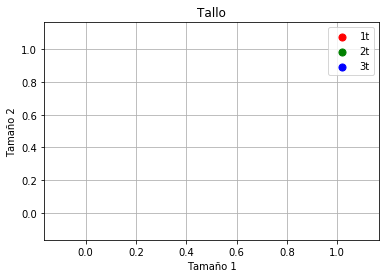

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Tamaño 1') 
ax.set_ylabel('Tamaño 2') 
ax.set_title('Tallo') 
targets = ['1t', '2t', '3t']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, '1']
    , df_pca.loc[indicesToKeep, '2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

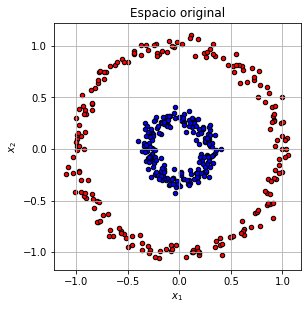

In [8]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

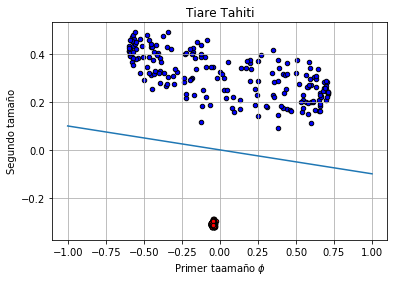

In [9]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Tiare Tahiti")
plt.xlabel("Primer taamaño $\phi$")
plt.ylabel("Segundo tamaño")
plt.grid()